In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import collections
import matplotlib.pyplot as plt



from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
# Load the dataset from the CSV file
df = pd.read_csv("D:\Data science\Final Project\Stress.csv")

In [3]:
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [4]:
# Print information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [5]:
# Check for null values in the dataset
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [6]:
# Assign the 'text' and 'label' columns to variables
text = df['text']
label = df['label']

In [7]:
text

0       He said he had not felt that way before, sugge...
1       Hey there r/assistance, Not sure if this is th...
2       My mom then hit me with the newspaper and it s...
3       until i met my new boyfriend, he is amazing, h...
4       October is Domestic Violence Awareness Month a...
                              ...                        
2833    * Her, a week ago: Precious, how are you? (I i...
2834    I don't have the ability to cope with it anymo...
2835    In case this is the first time you're reading ...
2836    Do you find this normal? They have a good rela...
2837    I was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [8]:
label

0       1
1       0
2       1
3       1
4       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2838, dtype: int64

In [9]:
# Display the count of each unique value in the 'label' column
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [10]:
# Compute summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,2838.0,5.243129e-01,4.994965e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
confidence,2838.0,8.089718e-01,1.770383e-01,4.285714e-01,6.000000e-01,8.000000e-01,1.000000e+00,1.000000e+00
social_timestamp,2838.0,1.518107e+09,1.552209e+07,1.483274e+09,1.509698e+09,1.517066e+09,1.530898e+09,1.542592e+09


In [11]:
# Get unique values in the 'subreddit' column
df["subreddit"].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [12]:
# Display the count of each unique value in the 'subreddit' column
df['subreddit'].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [13]:
# Statistical Information
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


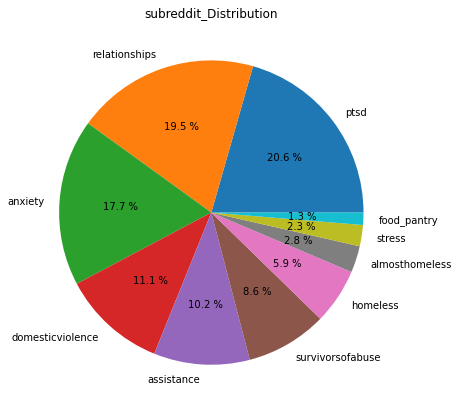

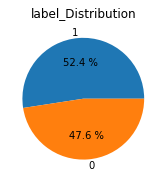

In [14]:
# Visualize the distribution of 'subreddit' and 'label' columns
lst=['subreddit','label']
plt.figure(figsize=(15,12))
for i in range(len(lst)):
    plt.subplot(1,2,i+1)
    a=df[lst[i]].value_counts()
    lbl=a.index
    plt.title(lst[i]+'_Distribution')
    plt.pie(x=a,labels=lbl,autopct="%.1f %%")
    plt.show()

<AxesSubplot:title={'center':'Sbreddit Vs Confidence'}, xlabel='subreddit'>

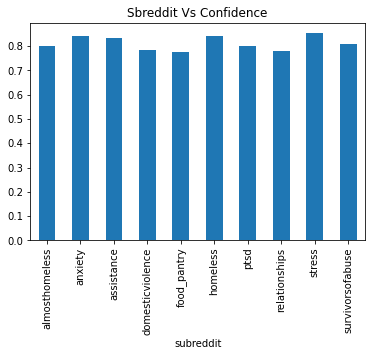

In [15]:
# Visualize the mean 'confidence' value for each subreddit
plt.title("Sbreddit Vs Confidence")
df.groupby("subreddit")["confidence"].mean().plot(kind="bar")

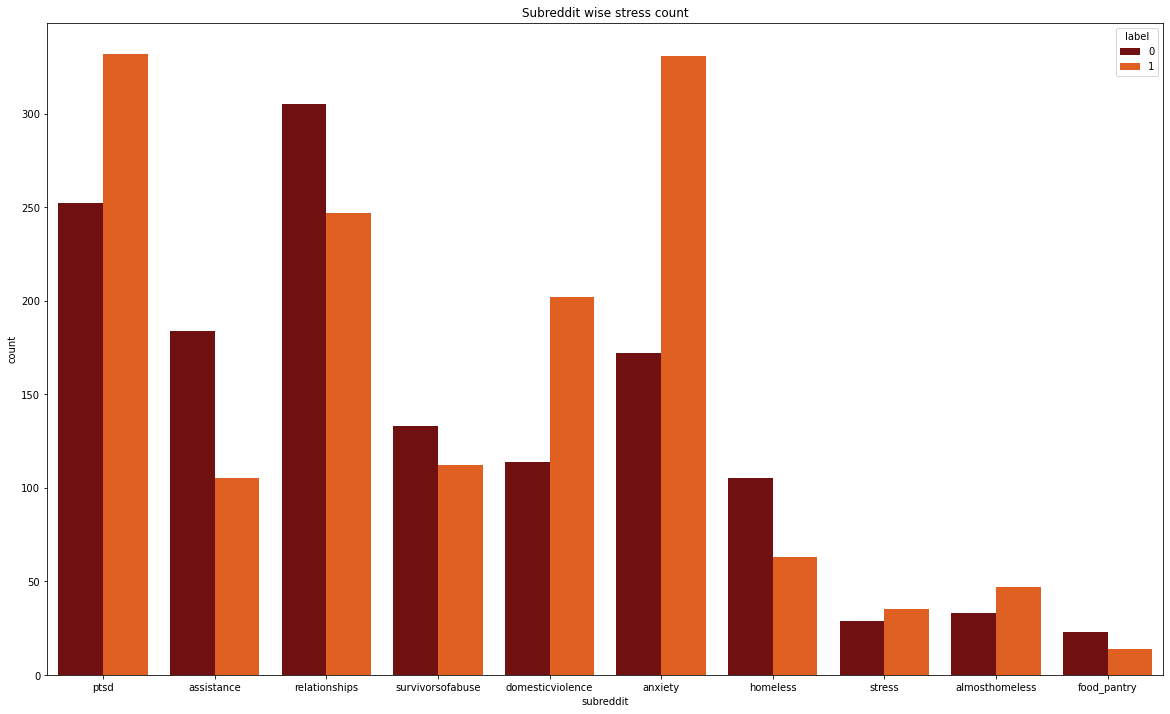

In [16]:
# Visualize the count of stress labels for each subreddit
plt.figure(figsize=(20,12))
plt.title('Subreddit wise stress count')
plt.xlabel('Subreddit')
sns.countplot(data=df,x='subreddit',hue='label',palette='gist_heat')
plt.show()

In [17]:
# Prepare the text (X) and label (y) data
X = df["text"]
y = df["label"]

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# Apply TF-IDF vectorization to the text data
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [21]:
# Train a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [22]:
# Make predictions on the test set
preds = nb.predict(X_test_tfidf)
preds[5]

0

In [23]:
nb.score(X_test_tfidf,y_test)

0.6830985915492958

In [24]:
# Print the classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.38      0.54       408
           1       0.63      0.96      0.76       444

    accuracy                           0.68       852
   macro avg       0.76      0.67      0.65       852
weighted avg       0.75      0.68      0.65       852



In [25]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [36]:
# Define a function to report evaluation metrics
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)
 

NB MODEL
              precision    recall  f1-score   support

           0       0.89      0.38      0.54       408
           1       0.63      0.96      0.76       444

    accuracy                           0.68       852
   macro avg       0.76      0.67      0.65       852
weighted avg       0.75      0.68      0.65       852



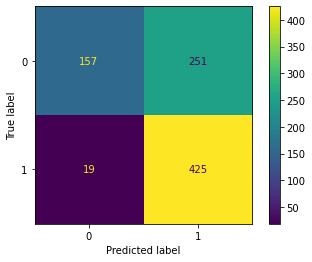

In [37]:
# Call the report function with the Naive Bayes model
print("NB MODEL")

report(nb)

In [38]:
# Train a BernoulliNB Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_tfidf,y_train)
bnb.score(X_test_tfidf,y_test)

0.7136150234741784

Bernoulli NB MODEL
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       408
           1       0.67      0.87      0.76       444

    accuracy                           0.71       852
   macro avg       0.73      0.71      0.70       852
weighted avg       0.73      0.71      0.70       852



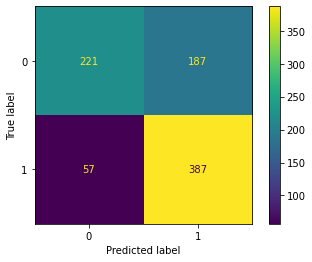

In [39]:
print("Bernoulli NB MODEL")
report(bnb)

In [40]:
# Train  LogisticRegression classifier
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)
log.score(X_test_tfidf,y_test)

0.7312206572769953

Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       408
           1       0.72      0.80      0.76       444

    accuracy                           0.73       852
   macro avg       0.73      0.73      0.73       852
weighted avg       0.73      0.73      0.73       852



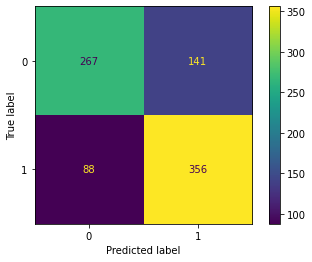

In [41]:
print("Logistic Regression")
report(log)

In [42]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)
svc.score(X_test_tfidf,y_test)

0.7276995305164319

SVC
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       408
           1       0.72      0.79      0.75       444

    accuracy                           0.73       852
   macro avg       0.73      0.72      0.73       852
weighted avg       0.73      0.73      0.73       852



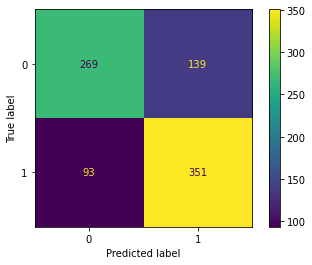

In [43]:
print('SVC')
report(svc)